<a href="https://www.kaggle.com/code/danijia/bellabeat-case-study?scriptVersionId=279762442" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Bellabeat Smart Device Usage Analysis
### Case Study 2: How Can a Wellness Technology Company Play It Smart?

**Author:** Danijia Haggins  
**Date:** October 2025  
**Tools:** Python, Pandas, Matplotlib, NumPy

## **Scenario** 
I am a consumer insights analyst on the marketing analytics team at Bellabeat, a tech company that makes wellness products for women. The CCO of the company believes that analyzing smart device fitness data could provide valuable insights to inform Bellbeats marketing strategy. 

## **Business Task**:
Analyze smart device usage from FitBit users to discover trends in activity, sleep, and wellness habits. Apply these insights to help **Bellabeat** understand how consumers enage with health-tracking devices. Apply these insights to help Bellabeat improve marketing strategies for the Leaf wellness tracker. 

[Data source](https://www.kaggle.com/datasets/arashnic/fitbit)

In this case study I am following 6 steps of the data analysis process: 
1. Ask
2. Prepare
3. Process
4. Analyze
5. Share
6. Act 


## ASK
**Key stakeholders**:
1. Urška Sršen (Cofounder & Chief Creative Officer)
2. Sando Mur (Cofounder, Executive Team)

**Key Questions Guiding Analysis**
1. What are the main trends in smart device usage?
2. How do these trends relate to Bellabeat customers?
3. How can these insights inform Bellabeats marketing strategy?

## 1. Prepare

### About this data
* The data is being loaded, processed, and analyzed within Kaggle notebooks using python, stored for the purposes of this project memory
* The time range this data represents is March 12, 2016-May 12, 2016
* The source data is stored in CSVs (29 total)
* The data is mostly long format, with a few of the csvs replicated in wide format
* The data has been made available by Creative Commons under the [CCO: Public Domain License](https://creativecommons.org/publicdomain/zero/1.0/)

In [1]:
# installing libraries needed 

import numpy as np # linear algebra
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt # plotting 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy.stats import pearsonr, linregress
import os
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/working/__notebook__.ipynb


## 2. Process 
* I'm using python to process (clean/transform) because:
    * I can clean, transform, and analyze the data in one place without switching platforms like with sql and excel.
    * Python is also good for scalability as it can support high-volume data better than spreadsheets can (excel won't display more than 1,048,576 rows--this data includes more rows than that).
    * I can document every step and analyze in one place, creating easily reproducible results.

### 📈🛑 Data Limitations
* There are two folders containing data, one folder for user data between March 12, 2016 to April 11, 2016 and another for data from April 12, 2016 to May 12, 2016. Each folder contains 11 csvs with the same columns, and will need to be combined in the data cleaning/preprocessing.
* Two participants (IDs 2891001357 and 6391747486) appear only in the first dailyActivity_merged dataset (from 3.12.16 to 4.11.16) and have no recorded activity after April 11, 1016. This may indicate device non-use or drop out during the study period. 
* Some csvs only represent a subset of data for users between April 12, 2016 - May 12, 2016: dailySteps, dailyintensities, dailycalories, and sleepday. This data is also redundant as total counts for steps and calories are included in the dailyActivities csvs, and steps are included in the minuteSteps csvs. We will not be using these csvs for the purposes of this analysis.
* Some of the minute data is too granular for the purposes of this analysis: minuteCalories, minuteIntensities, and minuteMETS will not be used for the purposes of this analysis.
*  Users may not wear their devices every day

### 📁 Data Preparation 
Of the 29 csvs provided in the fitbit dataset, only the following were used for this analysis: 
* daily_activity
* heartrate_seconds
* minute_sleep
* hourly_calories
* hourly_intensities
* hourly_steps
* weight_logInfo 

These were selected because they contain the most relevant and complete data for understanding user activity and health behavior. Files with incomplete, duplicate, or overly granular data (such as minute level logs) were excluded to simplify analysis and maintain clarity. 

### 🔄 Data Loading
* Import the csvs into dataframes 
* Inspect structure
* Combine csvs with matching columns + data into one dataframe
* Check dataframe data types to avoid computational errors. 

In [2]:
# loading the csv data into separate dataframes
da1 = pd.read_csv('/kaggle/input/bella-beat-case-study/data/fitabase_data_3.12.16_to_4.11.16/dailyActivity_merged_1.csv')
da2 = pd.read_csv('/kaggle/input/bella-beat-case-study/data/fitabase_data_4.12.16_to_5.12.16/dailyActivity_merged_2.csv')
hs1 = pd.read_csv('/kaggle/input/bella-beat-case-study/data/fitabase_data_3.12.16_to_4.11.16/heartrate_seconds_merged_1.csv')
hs2 = pd.read_csv('/kaggle/input/bella-beat-case-study/data/fitabase_data_4.12.16_to_5.12.16/heartrate_seconds_merged_2.csv')
hc1 = pd.read_csv('/kaggle/input/bella-beat-case-study/data/fitabase_data_3.12.16_to_4.11.16/hourlyCalories_merged_1.csv')
hc2 = pd.read_csv('/kaggle/input/bella-beat-case-study/data/fitabase_data_4.12.16_to_5.12.16/hourlyCalories_merged_2.csv')
hi1 = pd.read_csv('/kaggle/input/bella-beat-case-study/data/fitabase_data_3.12.16_to_4.11.16/hourlyIntensities_merged_1.csv')
hi2 = pd.read_csv('/kaggle/input/bella-beat-case-study/data/fitabase_data_4.12.16_to_5.12.16/hourlyIntensities_merged_2.csv')
hstps1 = pd.read_csv('/kaggle/input/bella-beat-case-study/data/fitabase_data_3.12.16_to_4.11.16/hourlySteps_merged_1.csv')
hstps2 = pd.read_csv('/kaggle/input/bella-beat-case-study/data/fitabase_data_4.12.16_to_5.12.16/hourlySteps_merged_2.csv')
msl1= pd.read_csv('/kaggle/input/bella-beat-case-study/data/fitabase_data_3.12.16_to_4.11.16/minuteSleep_merged_1.csv')
msl2 = pd.read_csv('/kaggle/input/bella-beat-case-study/data/fitabase_data_4.12.16_to_5.12.16/minuteSleep_merged_2.csv')
wlg1 = pd.read_csv('/kaggle/input/bella-beat-case-study/data/fitabase_data_3.12.16_to_4.11.16/weightLogInfo_merged_1.csv') 
wlg2 = pd.read_csv('/kaggle/input/bella-beat-case-study/data/fitabase_data_4.12.16_to_5.12.16/weightLogInfo_merged_2.csv')



In [3]:
# check for nulls / missing data
# create a dictionary with the dataframes and their names
dict1 = {'da1': da1, 
       'da2': da2, 
       'hs1': hs1, 
       'hs2': hs2, 
       'hc1': hc1, 
       'hc2': hc2, 
       'hi1': hi1, 
       'hi2': hi2, 
       'hstps1': hstps1, 
       'hstps': hstps2,  
       'msl1': msl1, 
       'msl2': msl2, 
       'wlg1': wlg1, 
       'wlg2': wlg2
      }

# iterate over dict1
for name, df in dict1.items():
    print(f"Null values in {name}:")
    null_counts = df.isnull().sum()
    if null_counts.sum() > 0: # can use .any() or .sum()
        print(null_counts[null_counts > 0]) # Print only columns with nulls
    else:
        print("No null values found.")
    print("\n")



Null values in da1:
No null values found.


Null values in da2:
No null values found.


Null values in hs1:
No null values found.


Null values in hs2:
No null values found.


Null values in hc1:
No null values found.


Null values in hc2:
No null values found.


Null values in hi1:
No null values found.


Null values in hi2:
No null values found.


Null values in hstps1:
No null values found.


Null values in hstps:
No null values found.


Null values in msl1:
No null values found.


Null values in msl2:
No null values found.


Null values in wlg1:
Fat    31
dtype: int64


Null values in wlg2:
Fat    65
dtype: int64




**Note:** 
Datframes wlg1 & wlg2 contain NaN values in the body fat column because some users did not record their body fat percentages. This will not cause errors in analysis. Leaving this as is but making a note here. 

### Combining/Merging CSV's 

In [4]:
# combining csv's with the same columns into one dataframe
daily_activity = pd.concat([da1, da2])
heartrate_seconds = pd.concat([hs1, hs2])
hourly_calories = pd.concat([hc1, hc2])
hourly_intensities = pd.concat([hi1, hi2])
hourly_steps = pd.concat([hstps1, hstps2])
minute_sleep = pd.concat([msl1, msl2])
weight_log_info = pd.concat([wlg1, wlg2])

In [5]:
# store combined + other dataframes in a dataframe
all_dfs = [daily_activity, heartrate_seconds, hourly_calories, hourly_intensities, hourly_steps, minute_sleep, weight_log_info]

# view first 5 rows of each dataframe
for i, x in enumerate(all_dfs, 1): 
    print(f'Dataframe {i}:')
    display(x.head())
    print('\n')

Dataframe 1:


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886




Dataframe 2:


,Id,Time,Value
0,2022484408,4/1/2016 7:54:00 AM,93
1,2022484408,4/1/2016 7:54:05 AM,91
2,2022484408,4/1/2016 7:54:10 AM,96
3,2022484408,4/1/2016 7:54:15 AM,98
4,2022484408,4/1/2016 7:54:20 AM,100




Dataframe 3:


,Id,ActivityHour,Calories
0,1503960366,3/12/2016 12:00:00 AM,48
1,1503960366,3/12/2016 1:00:00 AM,48
2,1503960366,3/12/2016 2:00:00 AM,48
3,1503960366,3/12/2016 3:00:00 AM,48
4,1503960366,3/12/2016 4:00:00 AM,48




Dataframe 4:


,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,3/12/2016 12:00:00 AM,0,0.0
1,1503960366,3/12/2016 1:00:00 AM,0,0.0
2,1503960366,3/12/2016 2:00:00 AM,0,0.0
3,1503960366,3/12/2016 3:00:00 AM,0,0.0
4,1503960366,3/12/2016 4:00:00 AM,0,0.0




Dataframe 5:


,Id,ActivityHour,StepTotal
0,1503960366,3/12/2016 12:00:00 AM,0
1,1503960366,3/12/2016 1:00:00 AM,0
2,1503960366,3/12/2016 2:00:00 AM,0
3,1503960366,3/12/2016 3:00:00 AM,0
4,1503960366,3/12/2016 4:00:00 AM,0




Dataframe 6:


,Id,date,value,logId
0,1503960366,3/13/2016 2:39:30 AM,1,11114919637
1,1503960366,3/13/2016 2:40:30 AM,1,11114919637
2,1503960366,3/13/2016 2:41:30 AM,1,11114919637
3,1503960366,3/13/2016 2:42:30 AM,1,11114919637
4,1503960366,3/13/2016 2:43:30 AM,1,11114919637




Dataframe 7:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,4/5/2016 11:59:59 PM,53.299999,117.506384,22.0,22.969999,True,1459900799000
1,1927972279,4/10/2016 6:33:26 PM,129.600006,285.719105,NaN,46.169998,False,1460313206000
2,2347167796,4/3/2016 11:59:59 PM,63.400002,139.773078,10.0,24.770000,True,1459727999000
3,2873212765,4/6/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1459987199000
4,2873212765,4/7/2016 11:59:59 PM,57.200001,126.104416,NaN,21.650000,True,1460073599000


In [6]:
# checking data types
all_dfs[0].info() # daily_activity, position 0 in all_dfs 
all_dfs[1].info() # heartrate seconds, position 1 in all_dfs
all_dfs[2].info() # hourly calories, position 2 in all_dfs
all_dfs[3].info() # hourly intensities, position 3 in all_dfs
all_dfs[4].info() # hourly steps, position 4 in all_dfs
all_dfs[5].info() # minute sleep, position 5 in all_dfs
all_dfs[6].info() # weight_log_info, position 6 in all_dfs

<class 'pandas.core.frame.DataFrame'>
Index: 1397 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1397 non-null   int64  
 1   ActivityDate              1397 non-null   object 
 2   TotalSteps                1397 non-null   int64  
 3   TotalDistance             1397 non-null   float64
 4   TrackerDistance           1397 non-null   float64
 5   LoggedActivitiesDistance  1397 non-null   float64
 6   VeryActiveDistance        1397 non-null   float64
 7   ModeratelyActiveDistance  1397 non-null   float64
 8   LightActiveDistance       1397 non-null   float64
 9   SedentaryActiveDistance   1397 non-null   float64
 10  VeryActiveMinutes         1397 non-null   int64  
 11  FairlyActiveMinutes       1397 non-null   int64  
 12  LightlyActiveMinutes      1397 non-null   int64  
 13  SedentaryMinutes          1397 non-null   int64  
 14  Calories      

In [7]:
# convert datetime columns from objects to datetime64 datatypes & check the columns and datatypes
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])
heartrate_seconds['Time'] = pd.to_datetime(heartrate_seconds['Time'])
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'])
hourly_intensities['ActivityHour'] = pd.to_datetime(hourly_intensities['ActivityHour'])
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])
minute_sleep['date'] = pd.to_datetime(minute_sleep['date'])
weight_log_info['Date'] = pd.to_datetime(weight_log_info['Date'])
 

/tmp/ipykernel_13/1549329201.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'])
/tmp/ipykernel_13/1549329201.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_intensities['ActivityHour'] = pd.to_datetime(hourly_intensities['ActivityHour'])
/tmp/ipykernel_13/1549329201.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])
/tmp/ipykernel_13/1549329201.py:8: UserWarning: Could not infer format, so each element wil

In [8]:
# check that datetime columns changed to datetime64
daily_activity['ActivityDate'].info() # daily_activity still an object but thats fine i think
heartrate_seconds['Time'].info() # heartrate seconds
hourly_calories['ActivityHour'].info() # hourly calories
hourly_intensities['ActivityHour'].info() # hourly intensities
hourly_steps['ActivityHour'] .info() # hourly steps
minute_sleep['date'].info() # minute sleep
weight_log_info['Date'].info() # weight_log_info

<class 'pandas.core.series.Series'>
Index: 1397 entries, 0 to 939
Series name: ActivityDate
Non-Null Count  Dtype         
--------------  -----         
1397 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 21.8 KB
<class 'pandas.core.series.Series'>
Index: 3638339 entries, 0 to 2483657
Series name: Time
Non-Null Count    Dtype         
--------------    -----         
3638339 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 55.5 MB
<class 'pandas.core.series.Series'>
Index: 46183 entries, 0 to 22098
Series name: ActivityHour
Non-Null Count  Dtype         
--------------  -----         
46183 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 721.6 KB
<class 'pandas.core.series.Series'>
Index: 46183 entries, 0 to 22098
Series name: ActivityHour
Non-Null Count  Dtype         
--------------  -----         
46183 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 721.6 KB
<class 'pandas.core.series.Series'>
Index: 46183 entrie

In [9]:
# Extracting hour of day from hourly data dataframes and adding a new column
hourly_calories['HourOfDay'] = hourly_calories['ActivityHour'].dt.hour
hourly_intensities['HourOfDay'] = hourly_intensities['ActivityHour'].dt.hour
hourly_steps['HourOfDay'] = hourly_steps['ActivityHour'].dt.hour
minute_sleep['HourOfDay'] = minute_sleep['date'].dt.hour
minute_sleep['Minute'] = minute_sleep['date'].dt.minute
minute_sleep['Second'] = minute_sleep['date'].dt.second


## 3. Analyze 
Now that data has be loaded and preprocessed, it's time for analysis. 

**Guiding questions:**
* What suprises did you find in the data?
* What trends and relationships did you find in the data?

**Key Tasks**
* Aggregate data so it's useful and accessible
* Organize and format data
* Perform calculations

### Calculate Aggregates

In [10]:
# avg calories per day
pd.set_option('display.max_rows', None)

avg_calories_per_day = (
    daily_activity.groupby('ActivityDate').agg(
    AvgCalories=('Calories', 'mean')
).round(2).sort_values('AvgCalories', ascending=True))
# print(type(avg_calories_per_day))

display(avg_calories_per_day)

,AvgCalories
ActivityDate,
2016-05-12,1139.29
2016-04-12,1650.68
2016-03-24,1883.50
2016-03-18,1947.00
2016-04-10,2025.90
2016-03-29,2114.80
2016-03-13,2128.50
2016-03-26,2159.50
2016-03-31,2160.73


In [11]:
# average steps per day
avg_steps_per_day = (
    daily_activity.groupby('ActivityDate')['TotalSteps']
    .mean()
    .round()
    .rename('AvgStepsPerDay') # Rename the 'TotalSteps' series to AvgStepsPerDay
    #.sort_values('AvgStepsPerDay', ascending=True)   
)

avg_steps_per_day = avg_steps_per_day.reset_index().sort_values('AvgStepsPerDay', ascending=True)

print(type(avg_steps_per_day))
display(avg_steps_per_day)


<class 'pandas.core.frame.DataFrame'>


,ActivityDate,AvgStepsPerDay
6,2016-03-18,658.0
12,2016-03-24,979.0
1,2016-03-13,1613.0
0,2016-03-12,2772.0
7,2016-03-19,2851.0
3,2016-03-15,2953.0
61,2016-05-12,3482.0
16,2016-03-28,4312.0
5,2016-03-17,4470.0
13,2016-03-25,4594.0


In [12]:
# calories vs. steps vs. sedentary minutes
sum_steps_calories_per_user = daily_activity.groupby('Id').agg(
    TotalCalories = ('Calories', 'sum'), 
    TotalSteps = ('TotalSteps', 'sum')
)

sum_steps_calories_per_user.head(10)

,TotalCalories,TotalSteps
Id,,
1503960366,90437,596789
1624580081,71689,258360
1644430081,113503,311237
1844505072,68169,123669
1927972279,94405,54570
2022484408,107513,498589
2026352035,64026,213286
2320127002,71834,183884
2347167796,67102,318355


Lets switch to a different dataframe

In [13]:
# display(hourly_calories.groupby('HourOfDay')[['Calories']].sum())
# print(hourly_calories.groupby('HourOfDay')[['Calories']].sum().max()) # 6pm hour with highest total calories

avg_calories_per_hour = hourly_calories.groupby('HourOfDay', as_index=False)[['Calories']].mean().round() # add_index=False prevents key error

display(avg_calories_per_hour)

print(avg_calories_per_hour.max()) # hour 18 and hour 19 (6 and 7pm) are tied for highest avg calories 


,HourOfDay,Calories
0,0,72.0
1,1,70.0
2,2,69.0
3,3,68.0
4,4,68.0
5,5,80.0
6,6,84.0
7,7,92.0
8,8,101.0
9,9,106.0


HourOfDay     23.0
Calories     119.0
dtype: float64


In [14]:
hourly_intensities.groupby('HourOfDay')[['TotalIntensity']].mean().round() #highest average intensities tied at 5, 7, 8 pm # visualization created below

,TotalIntensity
HourOfDay,
0,2.0
1,1.0
2,1.0
3,0.0
4,1.0
5,4.0
6,7.0
7,10.0
8,14.0


In [15]:
hourly_steps.groupby('HourOfDay')['StepTotal'].mean().round() # highest average steps at 6pm 

HourOfDay
0      43.0
1      22.0
2      14.0
3       7.0
4      11.0
5      35.0
6     148.0
7     286.0
8     395.0
9     432.0
10    459.0
11    455.0
12    534.0
13    496.0
14    506.0
15    398.0
16    471.0
17    500.0
18    550.0
19    555.0
20    378.0
21    284.0
22    204.0
23    112.0
Name: StepTotal, dtype: float64

In [16]:
# find minutes sleep, minutes restless, and minutes awake
sleep_summary = (minute_sleep
    .groupby(['Id', 'logId'])
    .agg (
        start_time=('date', 'min'),
        end_time=('date', 'max'),
        minutes_asleep=('value', lambda x: ( x == 1).sum()), 
        minutes_restless=('value', lambda x: (x == 2).sum()), 
        minutes_awake=('value', lambda x: (x == 3).sum())
    )
    .reset_index()
)

sleep_summary.head()

,Id,logId,start_time,end_time,minutes_asleep,minutes_restless,minutes_awake
0,1503960366,11114919637,2016-03-13 02:39:30,2016-03-13 09:44:30,411,15,0
1,1503960366,11126343681,2016-03-14 01:32:00,2016-03-14 07:57:00,354,27,5
2,1503960366,11134971215,2016-03-15 02:36:00,2016-03-15 08:10:00,312,16,7
3,1503960366,11142197163,2016-03-16 03:12:00,2016-03-16 08:14:00,272,26,5
4,1503960366,11142197164,2016-03-16 19:43:00,2016-03-16 20:45:00,61,2,0


Add and hours_slept column so we can get an idea of how many hours users slept per log id total. 

In [17]:
# add hours_slept column, where we calculate how many hours users slept rounded to 2 decimal places  
sleep_summary['hours_slept'] = (sleep_summary['minutes_asleep'] / 60).round(2)

sleep_summary.head(5).sort_values('start_time', ascending=True)

,Id,logId,start_time,end_time,minutes_asleep,minutes_restless,minutes_awake,hours_slept
0,1503960366,11114919637,2016-03-13 02:39:30,2016-03-13 09:44:30,411,15,0,6.85
1,1503960366,11126343681,2016-03-14 01:32:00,2016-03-14 07:57:00,354,27,5,5.90
2,1503960366,11134971215,2016-03-15 02:36:00,2016-03-15 08:10:00,312,16,7,5.20
3,1503960366,11142197163,2016-03-16 03:12:00,2016-03-16 08:14:00,272,26,5,4.53
4,1503960366,11142197164,2016-03-16 19:43:00,2016-03-16 20:45:00,61,2,0,1.02


I want to compare the users average hours slept to their average amount of calories burned. 

In [18]:
avg_hours_slept_per_user = sleep_summary.groupby('Id').hours_slept.mean().round(2).to_frame().reset_index()

average_calories_burned_per_user = daily_activity.groupby('Id').Calories.mean().round(2).to_frame().reset_index()

type(avg_hours_slept_per_user)
type(average_calories_burned_per_user)

pandas.core.frame.DataFrame

In [19]:
average_calories_burned_per_user.head()
avg_hours_slept_per_user.head()


,Id,hours_slept
0,1503960366,5.43
1,1644430081,7.25
2,1844505072,11.31
3,1927972279,4.64
4,2022484408,2.25


In [20]:
avg_calories_vs_avg_hours_slept = pd.merge(
    avg_hours_slept_per_user, 
    average_calories_burned_per_user, 
    left_on='Id', 
    right_on='Id', 
    suffixes=('_avg_hours_slept', '_avg_calories_burned')
)

print(avg_calories_vs_avg_hours_slept.sort_values('Calories', ascending=True))

            Id  hours_slept  Calories
8   3977333714         4.38   1480.64
5   2026352035         8.61   1488.98
2   1844505072        11.31   1585.33
6   2320127002         1.02   1670.56
0   1503960366         5.43   1808.74
15  5553957443         5.95   1855.26
13  4558609924         2.68   1976.58
24  8792009665         5.94   1994.90
19  6962181067         6.81   2015.38
10  4319703577         7.61   2025.56
7   2347167796         7.34   2033.39
12  4445114986         4.11   2160.63
3   1927972279         4.64   2195.47
17  6117666160         5.27   2218.55
18  6775888955         4.95   2284.26
21  7086361926         7.25   2457.70
4   2022484408         2.25   2500.30
20  7007744171         1.10   2570.24
9   4020332650         4.92   2736.06
11  4388161847         5.13   2829.54
1   1644430081         7.25   2837.58
14  4702921684         6.61   2918.57
22  8053475328         5.79   2932.02
16  5577150313         5.72   3343.71
23  8378563200         5.60   3414.14


In [21]:
# many users did not record their sleep as often 

recorded_sleep_count = sleep_summary.groupby('Id').agg(
    recorded_sleep_count = ('logId', 'count') 
).sort_values('recorded_sleep_count', ascending=True)

display(recorded_sleep_count)

,recorded_sleep_count
Id,
2022484408,1
2320127002,1
8053475328,4
1844505072,5
1644430081,6
4558609924,8
7007744171,10
6775888955,20
4020332650,28


### Notes on sleep data: 
- Some people that recorded their sleep were not consistent in tracking their sleep.
- Reccomendations:
- 1. Modify watch product so that it can be worn comfortably during sleep, or offer alternative watch bands to make them more comfortable
  2. Create sleep rewards, rewarding users when they sleep for 7 hours or more
  3. Give users reminders to get ready to sleep

In [22]:
# hourly_intensities.head(3)

avg_intensity_phour = hourly_intensities.groupby('HourOfDay', as_index=False).agg(
    avg_intensity_per_hour = ('TotalIntensity', 'mean')
).round(2).reset_index(drop=True)

# print(avg_intensity_phour)

#7am - 9pm highest average intensities, tracks with working hours 



## Visualize


0.5901599477780501 7.269987389738127e-132


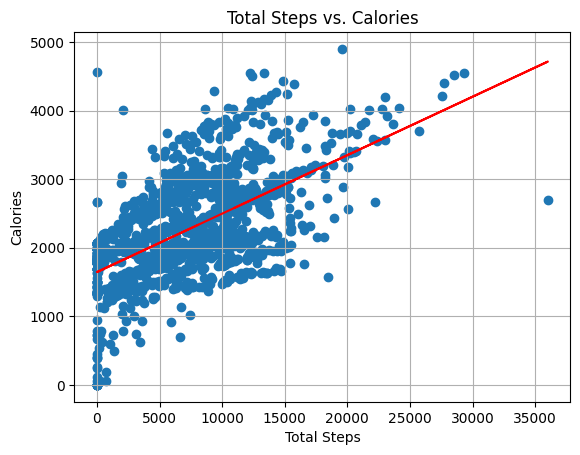

In [23]:
# Show the correlation between calories and steps 
y_data = daily_activity['Calories']
x_data = daily_activity['TotalSteps']

# calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(x_data, y_data)

# perform linear regression to get the line paramters
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

print(correlation_coefficient, p_value)
plt.scatter(x_data, y_data)
# plot the regression line
plt.plot(x_data, slope * x_data + intercept, color='red', label=f'Regression Line (r={correlation_coefficient:.2f})')
plt.ylabel('Calories')
plt.xlabel('Total Steps')
plt.title('Total Steps vs. Calories')
plt.grid(True)
plt.show()

### Notes on Total Steps vs. Calories
- The relationship between Steps vs. Calories appears to be positively correlated, as the correlation coefficient is 0.5901599477780501 (greater than 0, and the p-value is 7.269987389738261e-132 (less than 0.05) suggesting that this correlation is highly statiscally significant, and there is virtually no chance the relationship between steps and calories occured by chance.
- Reccomendation:
  * Create incentives for users to meet a step goal
  * Create incentives for users to meet calories burned goal

0.1698104822321204 7.269987389738127e-132


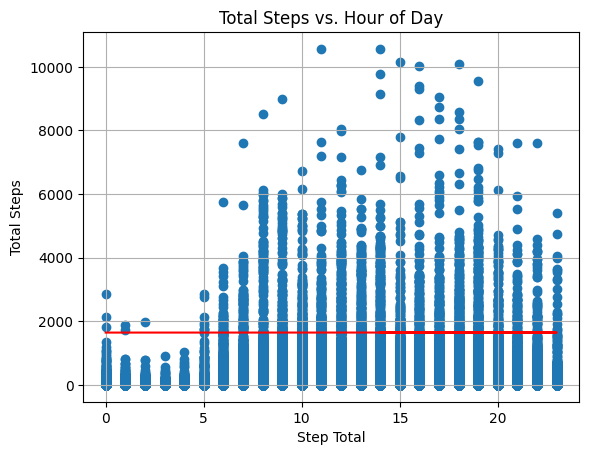

In [24]:
x_steps = hourly_steps['HourOfDay']
y_steps = hourly_steps['StepTotal']

# calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(x_steps, y_steps)

# perform linear regression to get the line paramters
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

print(correlation_coefficient, p_value)

plt.scatter(x_steps, y_steps)
plt.plot(x_steps, slope * x_steps + intercept, color='red', label=f'Regression Line (r={correlation_coefficient:.2f})')
plt.ylabel('Total Steps')
plt.xlabel('Step Total')
plt.title('Total Steps vs. Hour of Day')
plt.grid(True)
plt.show()

### Notes on Total Steps vs Hour of Day
Appears that people seem to take a few more steps as the day progresses, but the effect is small--steps vary widely across hours, even though the pattern is real due to the large sample size.

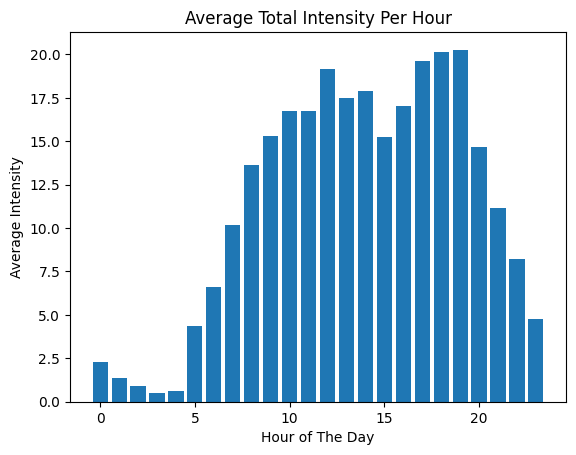

In [25]:
x_intensity = avg_intensity_phour['HourOfDay']
y_intensity = avg_intensity_phour['avg_intensity_per_hour']

plt.bar(x_intensity, y_intensity)
plt.xlabel('Hour of The Day')
plt.ylabel('Average Intensity')
plt.title('Average Total Intensity Per Hour')
plt.show()

### Notes on Average Total Intensity Per Hour
Hours with the highest average intensities are between 7am and 9pm. 
Reccomendations: 
1. Create incentives for users to do some kind of movement each hour whether it be standing, a quick stretch, or quick walk.
2. Give users reports at the end of the week of their individual most active hours 

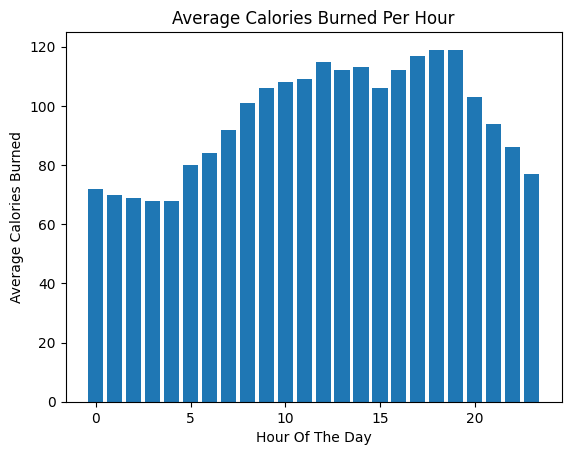

In [26]:
# Average total calories per hour
x_calories = avg_calories_per_hour['HourOfDay']
y_calories = avg_calories_per_hour['Calories']

plt.bar(x_calories, y_calories)
plt.xlabel('Hour Of The Day')
plt.ylabel('Average Calories Burned')
plt.title('Average Calories Burned Per Hour')
plt.show()

# Notes on Average Calories Burned Per Hour
Average calories burned each our are similar after about 9 am. Max is tied at 119 calories in the 18th and 19th hours (between 6 and 7 pm) and drops off around 8pm. 
Reveals that once the typical work day starts, users burn calories pretty steadily. 
1. Encourage users to incorporate more varied or intense physical activity during the day to increase overall calorie exenditure and potentially shift the peak activity to earlier hours for better sleep quality. 